In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the mushroom data

In [79]:
feature_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Read the data file into a DataFrame.
df = pd.read_csv("agaricus-lepiota.data", names=feature_names)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Check what the mushroom data columns are

In [82]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### What are we predicting?

We are predicting the class of a mushroom whether the mushroom is edible or poisonous (e or p) based on its features.

The overview of what we are going to do:
1. Check if the data is balanced.
2. Split the data into X (Features) and y (target or label)
3. Encode the data - scikit learn only understands numbers.
4. Use Decision tree as our baseline model.
5. Remove the features that have low importance
7. Create a new learning model without as many features.



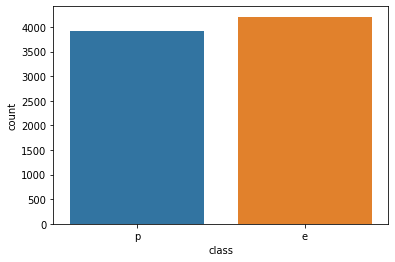

In [37]:
x = df['class']
ax = sns.countplot(x=x, data=df)

In [38]:
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [39]:
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [41]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train) 

In [43]:
clf.get_params() # we are using the default parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [44]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, ..., 0, 0, 0])

In [45]:
clf.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[1378,    0],
       [   0, 1303]], dtype=int64)

In [48]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

1.0

In [49]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

1.0

In [59]:
from sklearn import metrics

def print_classification_report(model, X_test, y_test): 
    y_preds = model.predict(X_test)
    print(metrics.classification_report(y_test, y_preds, target_names=['edible', 'poisonous']))

In [60]:
print_classification_report(clf, X_test, y_test)


              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1378
   poisonous       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [56]:
def random_forest_feature_importance(model, df): 
    return pd.DataFrame({'cols': df.columns, 'imp': model.feature_importances_}).sort_values('imp', ascending=False)

feature_importance = random_forest_feature_importance(clf, X)
feature_importance[:10]

,cols,imp
8,gill-color,0.343698
19,spore-print-color,0.212665
20,population,0.181092
7,gill-size,0.109055
4,odor,0.037586
21,habitat,0.030286
3,bruises,0.027439
9,stalk-shape,0.022918
14,stalk-color-below-ring,0.018415
10,stalk-root,0.007985


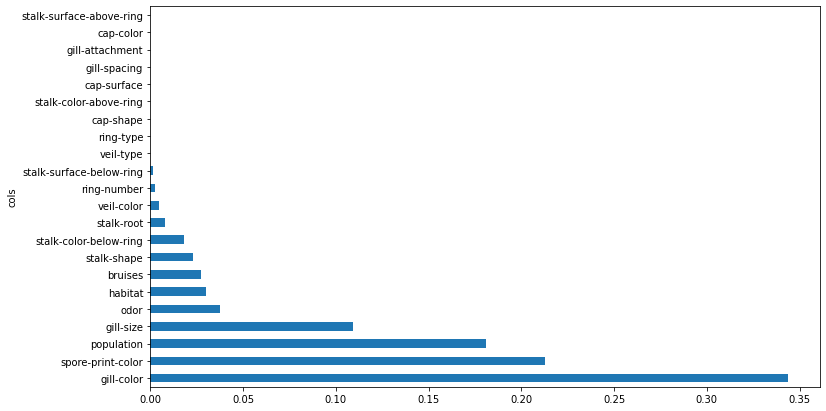

In [57]:
def plot_feat_imp(feat_importance):
    return feat_importance.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_feat_imp(feature_importance[:30]);


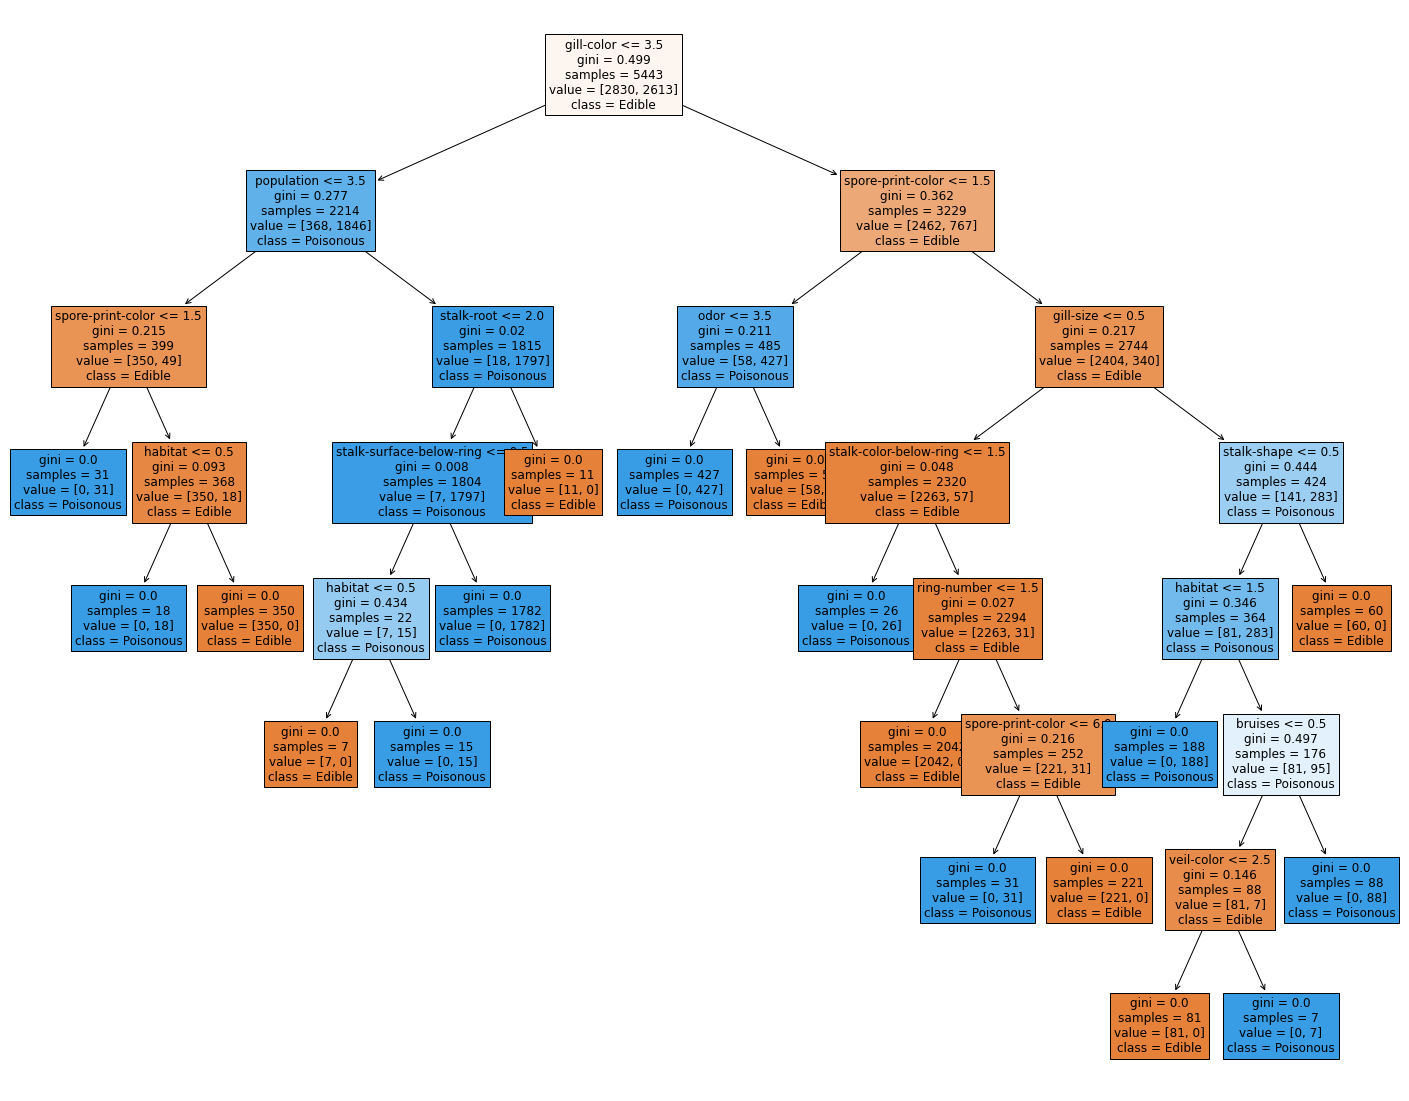

In [64]:
from sklearn import tree
from matplotlib import pyplot as plt
feature_names = list(X.columns)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=['Edible', 'Poisonous'],
                   filled=True,
                   fontsize=12)

In [65]:
to_keep = feature_importance[:4].cols
len(to_keep)

4

In [66]:
len(X.columns)

22

In [67]:
X_train = X_train[to_keep]
X_test = X_test[to_keep]

len(X_train.columns), len(X_test.columns)

(4, 4)

In [68]:
model_4features = DecisionTreeClassifier(random_state=42)
model_4features.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
print_classification_report(model_4features, X_test, y_test)


              precision    recall  f1-score   support

      edible       0.98      0.98      0.98      1378
   poisonous       0.98      0.98      0.98      1303

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



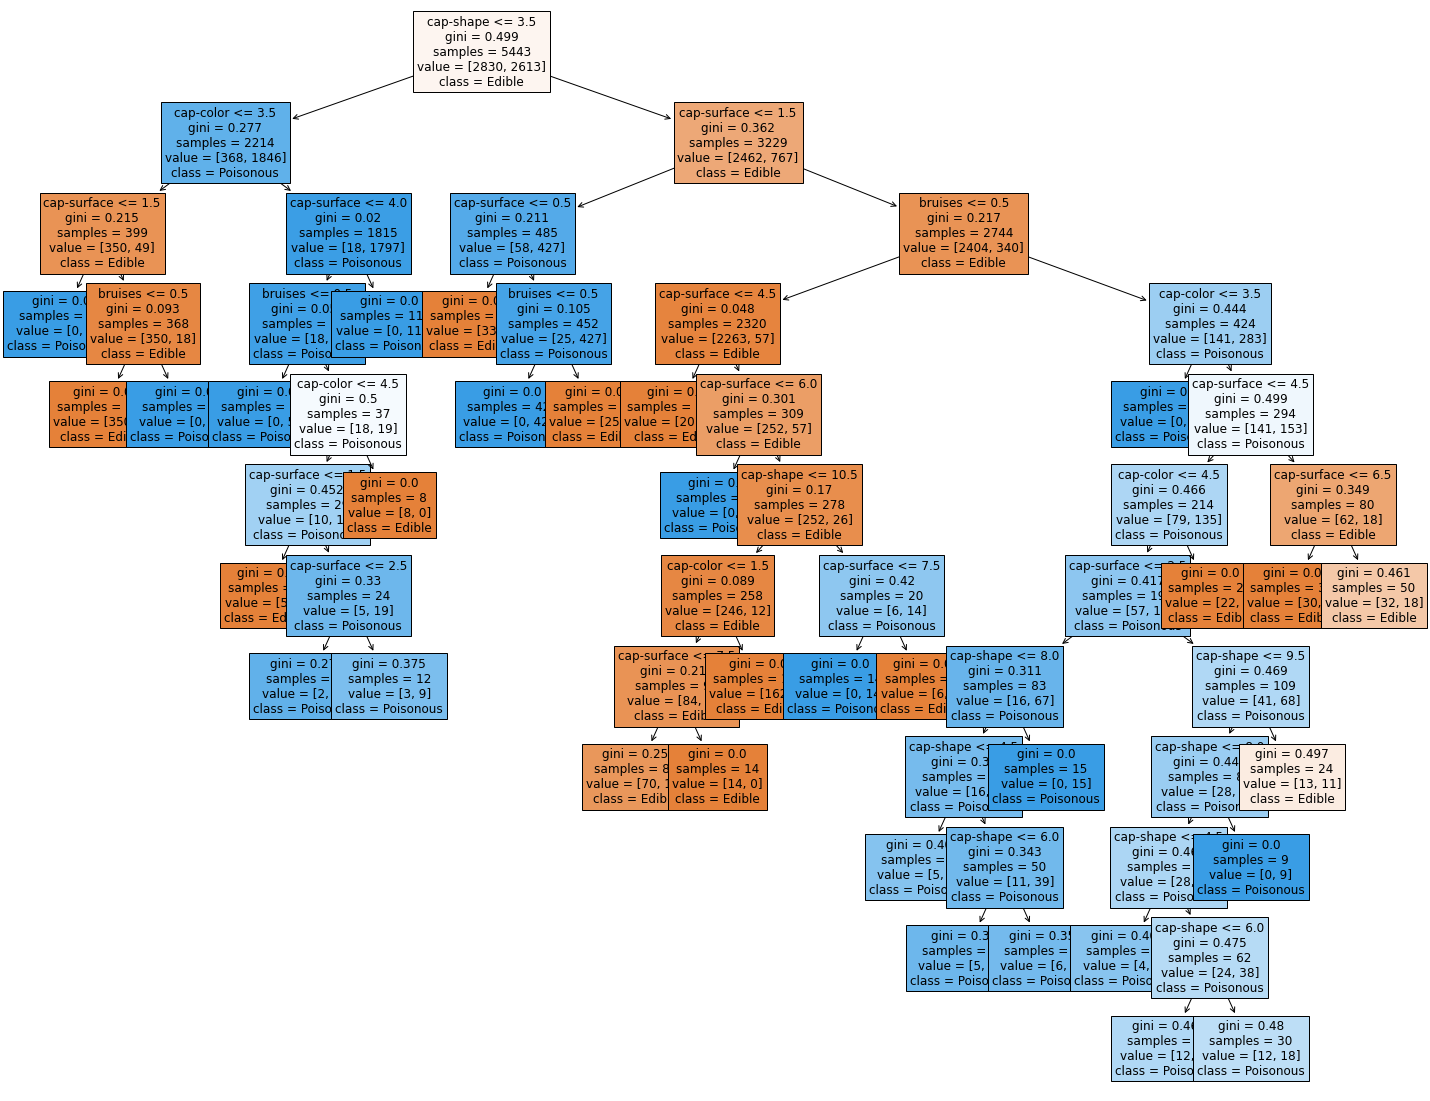

In [71]:
feature_names = list(X.columns)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model_4features, 
                   feature_names=feature_names,  
                   class_names=['Edible', 'Poisonous'],
                   filled=True,
                   fontsize=12)

In [72]:
model_shallow = DecisionTreeClassifier(max_depth=4, random_state=42)
model_shallow.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [73]:
print_classification_report(model_shallow, X_test, y_test)

              precision    recall  f1-score   support

      edible       0.98      0.93      0.96      1378
   poisonous       0.93      0.98      0.96      1303

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681



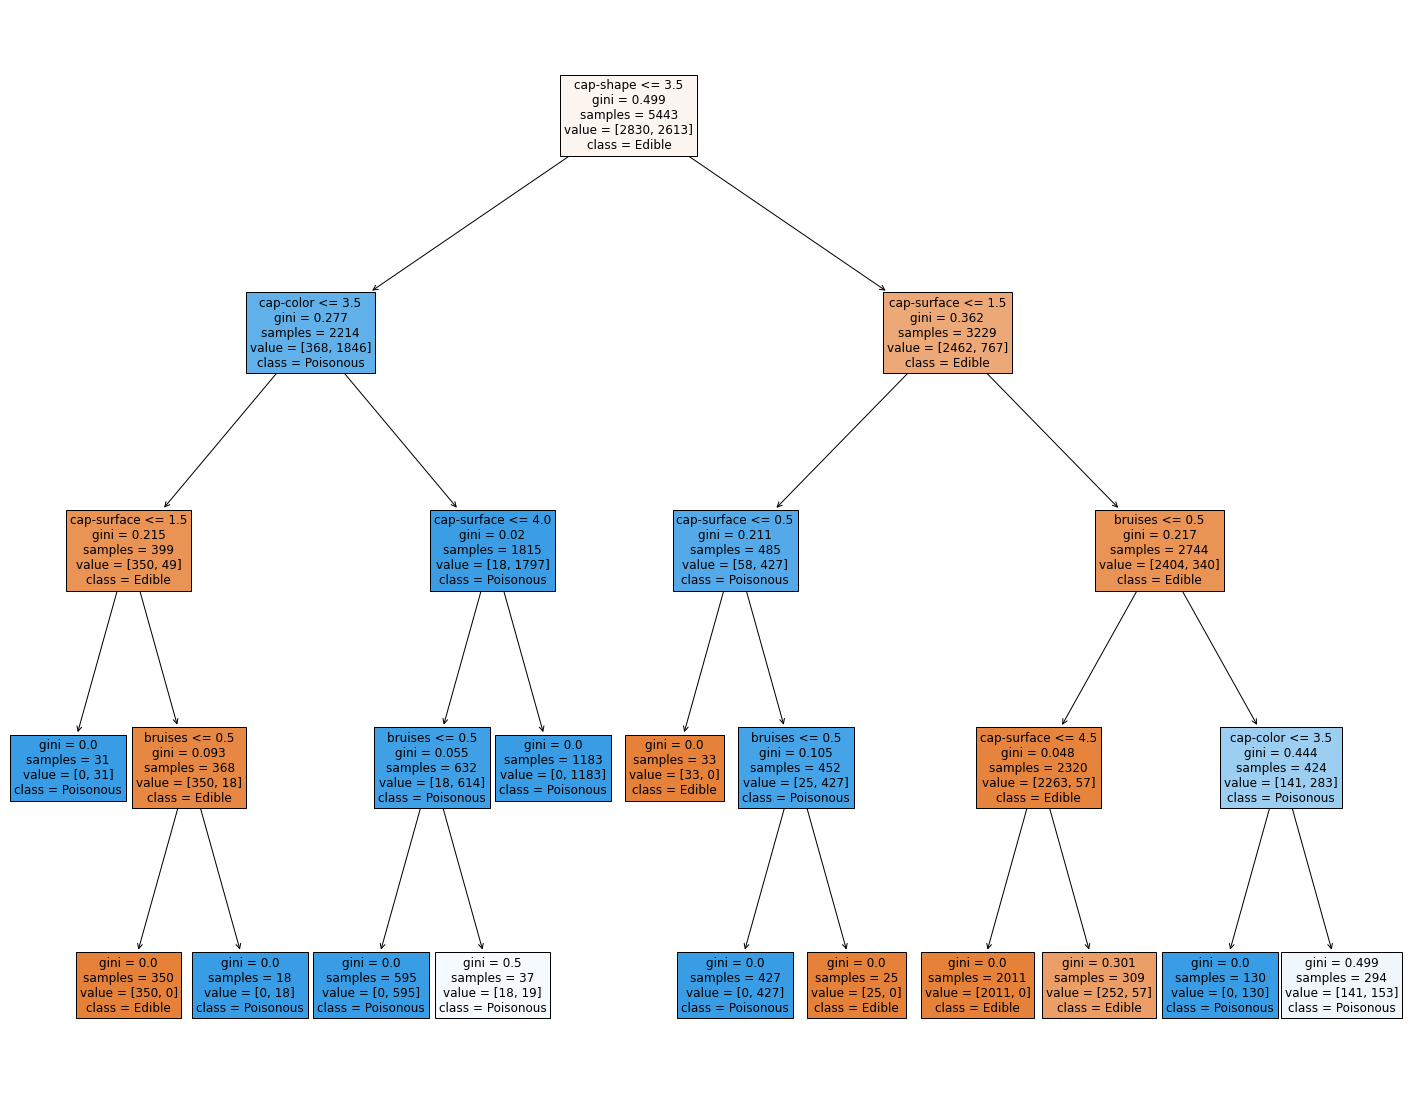

In [83]:
feature_names = list(X.columns)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model_shallow, 
                   feature_names=feature_names,  
                   class_names=['Edible', 'Poisonous'],
                   filled=True,
                   fontsize=12)

In [76]:
model_min_split = DecisionTreeClassifier(min_samples_split=35, random_state=42)
model_min_split.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_split=35, random_state=42)

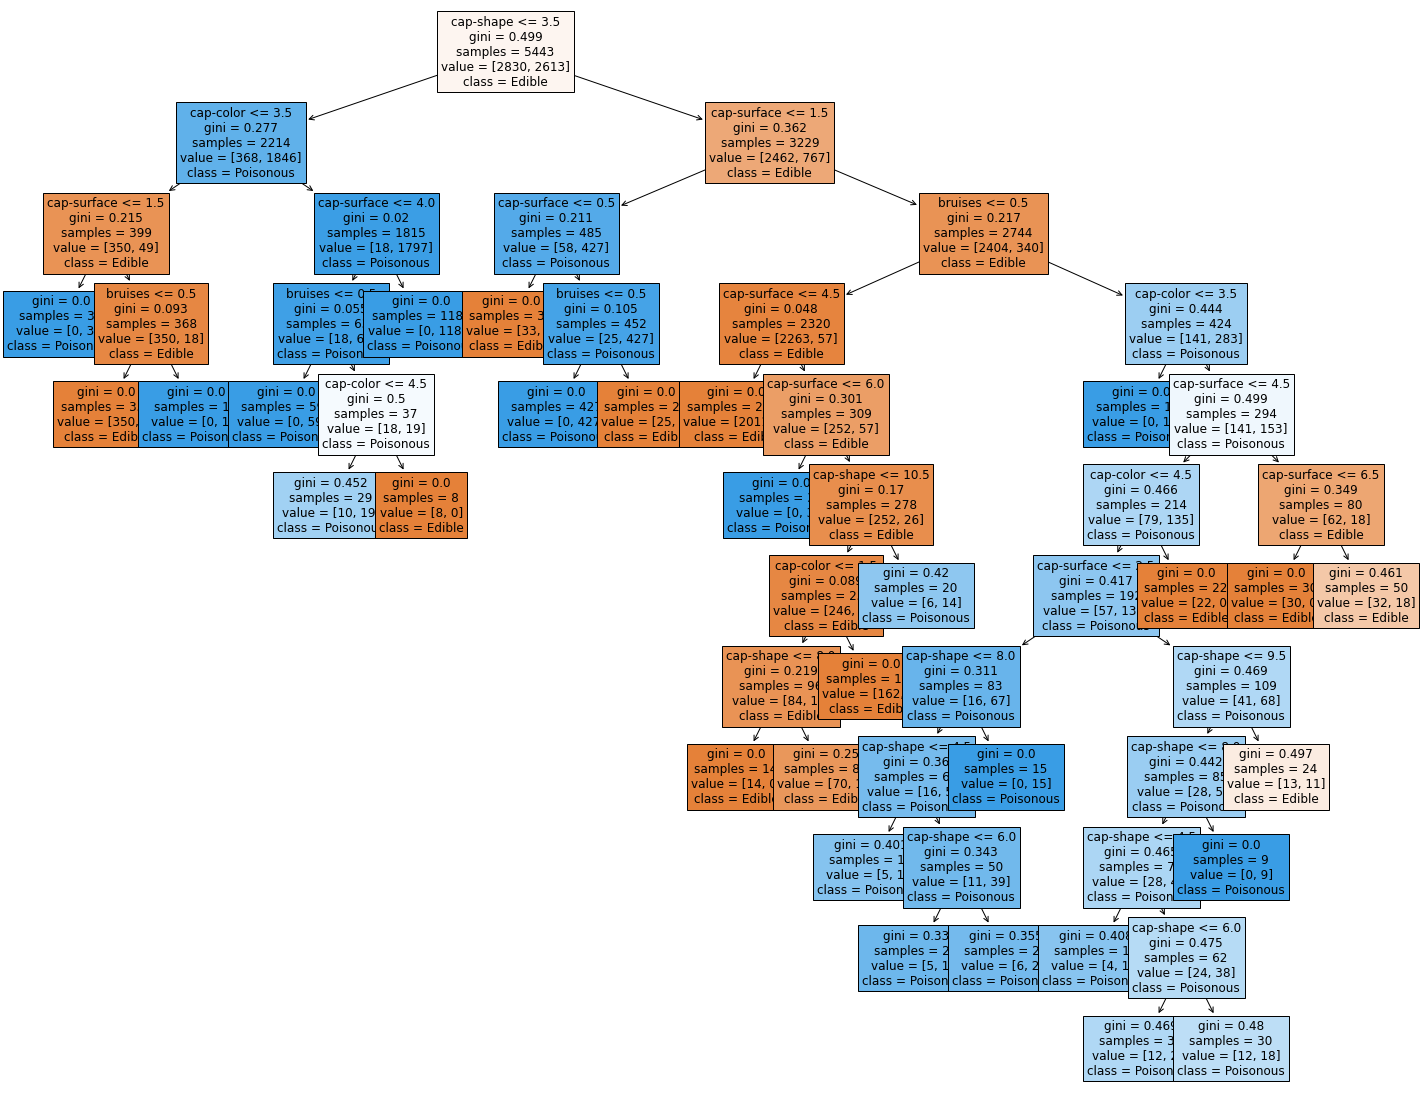

In [77]:
feature_names = list(X.columns)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model_min_split, 
                   feature_names=feature_names,  
                   class_names=['Edible', 'Poisonous'],
                   filled=True,
                   fontsize=12)

In [78]:
print_classification_report(model_min_split, X_test, y_test)


              precision    recall  f1-score   support

      edible       0.98      0.97      0.98      1378
   poisonous       0.97      0.98      0.97      1303

    accuracy                           0.98      2681
   macro avg       0.97      0.98      0.97      2681
weighted avg       0.98      0.98      0.98      2681



Reference: https://www.kaggle.com/code/madelinecaples/if-mushrooms-grew-on-trees/notebook?fbclid=IwAR03j5FFXj-FCDLhV---fBvFlT_aZKg69f35RoXGlmjYmoMXGScMKY0JB50